### 15.4 Model of Pulse and Recycle (PULSE)
From Odum and Odum:
PULSE (Figure 15.4a) is a production–consumption–recycle model that pulses without switches because the autocatalytic consumer unit has both linear and quadratic-autocatalytic intake
pathways. A process accumulates a storage Q, which is being consumed by the consumer unit C.

There are two modes of consumption, the slow gradual one and an epidemic destructive one. As the consumer unit grows, it reaches a point where the autocatalytic pathway accelerates in
a frenzy, using up the storage Q while giving a brief surge to the consumer storage C. Recycled outputs of consumption (wastes) are used by production again. Because pulsing designs prevail in
self-organization by generating more production in the long run, we can expect to find features of this model in all kinds of systems.
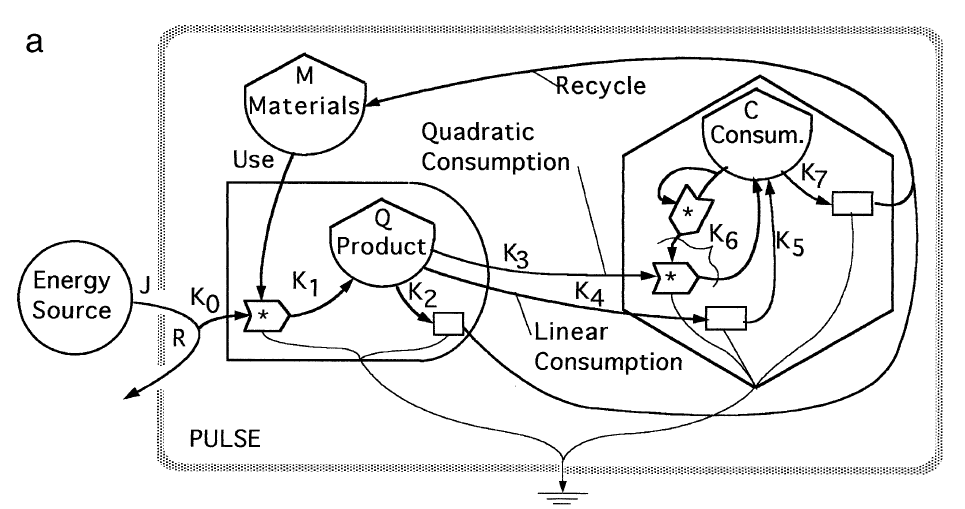

The model is expressed in differential equation format as:  

$$
\begin{align}
\frac{d Q}{dt} & = K_1 R M - K_2 Q - K_4 Q - K_3 Q C^2 \\
\frac{d C}{dt} & = K_5 Q + K_6 Q C^2 - K_7 C
\end{align}
$$

where $Q$ is the producer biomass and $C$ is the consumer biomass. $M$ represents a store of recyclable materials utilized by the producers given as:

$$
M = \left\{
    \begin{array}\\
        M_{Tot} - f_1 Q - f_2 C & \mbox{if } \ M_{Tot} - f_1 Q - f_2 C > 0.1 \\
        0.1 & \mbox{if } \ M_{Tot} - f_1 Q - f_2 C < 0.1
    \end{array}
\right.
$$

where $f_1$ and $f_2$ are fractional values--assumed constant--of biomass being recycled from the producers and consumers, respectively.

$R$ represents the available energy as a fraction of the total energy source, $J$.

$$
R = \frac{J}{1+K_0 M}
$$

$J$ and $M_{Tot}$ are constants as are the eight rate parameters, $K_0$ ... $K_7$.

The model is implemented below using the constant values and initial conditions provided in Odum and Odum.

Text(0, 0.5, 'Materials, M')

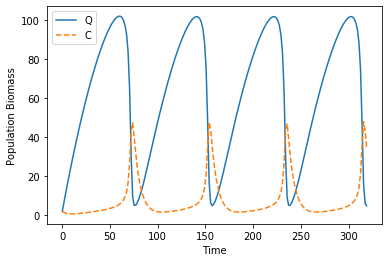

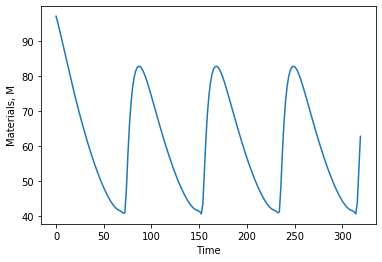

In [3]:
# import statements
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# set global constants
J, M_tot = 10, 100
K0, K1, K2 = 0.1, 0.03, 0.001
K3, K4, K5 = 0.0004, 0.01, 0.005
K6, K7 = 0.0003, 0.2
f1, f2 = 0.5, 1.0
# set up the derivative function
def PULSE(t, Q_arr):
    Q, C = Q_arr
    M = max (M_tot - f1*Q - f2*C, 0.1)
    R = J/(1+K0*M)
    dQ = K1*R*M - (K2 + K4)*Q - K3*Q*C**2
    dC = K5*Q + K6*Q*C**2 - K7*C
    return [dQ, dC]
# run the ODE solver
soln = solve_ivp(PULSE, (0, 319), [2,2], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='C')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.legend()
plt.figure()
plt.plot(t_arr, M_tot - f1*soln.sol(t_arr)[0] - f2*soln.sol(t_arr)[1])
plt.xlabel("Time")
plt.ylabel("Materials, M")

### What If 15.4-1
What happens if the total materials are reduced a tenth or increased by 10 times?

Text(0.5, 1.0, 'Decreased the total materials by a factor of 10')

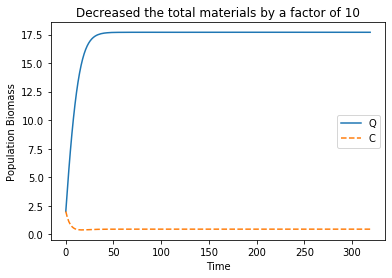

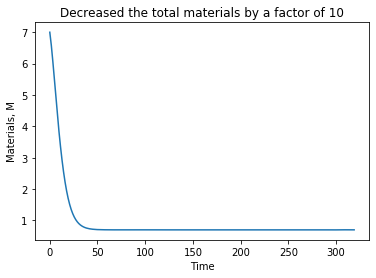

In [5]:
# Reduce M_tot
M_tot = 100/10
# run the ODE solver
soln = solve_ivp(PULSE, (0, 319), [2,2], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='C')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.title("Decreased the total materials by a factor of 10")
plt.legend()
plt.figure()
plt.plot(t_arr, M_tot - f1*soln.sol(t_arr)[0] - f2*soln.sol(t_arr)[1])
plt.xlabel("Time")
plt.ylabel("Materials, M")
plt.title("Decreased the total materials by a factor of 10")

Text(0.5, 1.0, 'Increased the total materials by a factor of 10')

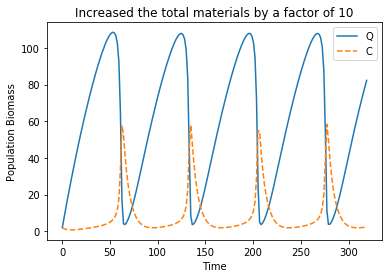

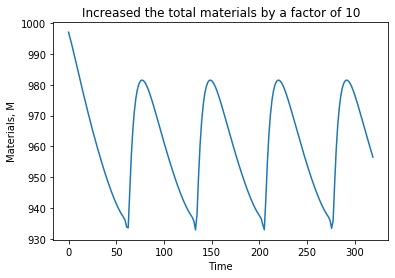

In [6]:
# Increase M_tot
M_tot = 100*10
# run the ODE solver
soln = solve_ivp(PULSE, (0, 319), [2,2], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='C')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.title("Increased the total materials by a factor of 10")
plt.legend()
plt.figure()
plt.plot(t_arr, M_tot - f1*soln.sol(t_arr)[0] - f2*soln.sol(t_arr)[1])
plt.xlabel("Time")
plt.ylabel("Materials, M")
plt.title("Increased the total materials by a factor of 10")

#### Descriptive comments on the simulations above.
Increasing the amount of available materials as no effect on the population biomass dyanamics. The cycling of materials simply stores the excess material within the system.

Decreasing the amount of available materials destroys the pulsing behavior of the system. The available resources become completely locked up in the producers which limits the ability of the producers to grow to a level that will support an autocatalytic growth phase in the consumers. As a result, the consumers are depleted to zero early in the simulation. 

### What If 15.4-2
What happens if the energy available is reduced a tenth
or increased by 10 times? Consider at what level energy
is well used.

Text(0.5, 1.0, 'Decreased the energy level by a factor of 10')

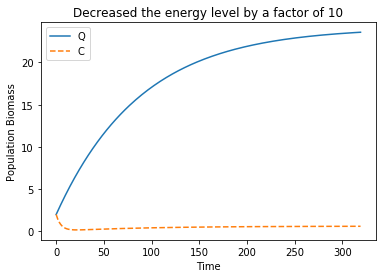

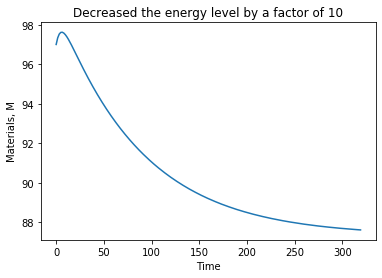

In [11]:
# Decreasing the energy level, J, by a factor of 10
J, M_tot = 10/10, 100
# run the ODE solver
soln = solve_ivp(PULSE, (0, 319), [2,2], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='C')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.title("Decreased the energy level by a factor of 10")
plt.legend()
plt.figure()
plt.plot(t_arr, M_tot - f1*soln.sol(t_arr)[0] - f2*soln.sol(t_arr)[1])
plt.xlabel("Time")
plt.ylabel("Materials, M")
plt.title("Decreased the energy level by a factor of 10")

Text(0.5, 1.0, 'Increased the energy level by a factor of 10')

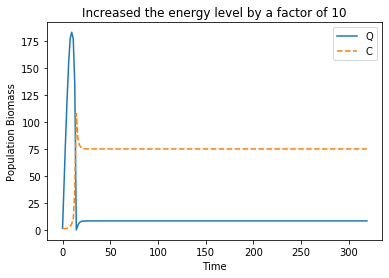

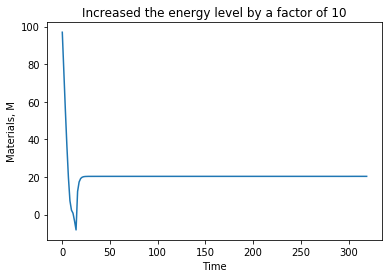

In [9]:
# Increasing the energy level, J, by a factor of 10
J, M_tot = 10*10, 100
# run the ODE solver
soln = solve_ivp(PULSE, (0, 319), [2,2], dense_output=True)
# graph the populations vs time
t_arr = np.linspace(0,319,200)
plt.plot(t_arr, soln.sol(t_arr)[0], '-', label='Q')
plt.plot(t_arr, soln.sol(t_arr)[1], '--', label='C')
plt.xlabel("Time")
plt.ylabel("Population Biomass")
plt.title("Increased the energy level by a factor of 10")
plt.legend()
plt.figure()
plt.plot(t_arr, M_tot - f1*soln.sol(t_arr)[0] - f2*soln.sol(t_arr)[1])
plt.xlabel("Time")
plt.ylabel("Materials, M")
plt.title("Increased the energy level by a factor of 10")

#### Comments on the simulations above
The lower energy simulation does not show pulsing behavior. This is because lowering the energy level decreases the rate of producer biomass accumulation so much that consumers are not able to achieve an autocatalytic growth phase. The consumers die off to a low (but non-zero) level early in the simulation.

The increase energy simulation also does not show pulsing behavior in the long term. The increased energy level initially drives a super-charged pulse but the large size of the initial pulse and depletion of the available recycled materials lead to a population crash for the producers. After the crash, the producers rise to a low steady-state level but the pulsing behavior is prohibited because of the large population of consumers placing a large downward forcing on producer growth.